In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 7
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((520, 12, 1), (520,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT7/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.2711 - root_mean_squared_error: 0.5207

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 8s 86ms/step - loss: 0.2650 - root_mean_squared_error: 0.5148 - val_loss: 0.2398 - val_root_mean_squared_error: 0.4897
Epoch 2/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1745 - root_mean_squared_error: 0.4177

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.1718 - root_mean_squared_error: 0.4145 - val_loss: 0.1880 - val_root_mean_squared_error: 0.4336
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1327 - root_mean_squared_error: 0.3643

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.1302 - root_mean_squared_error: 0.3609 - val_loss: 0.1588 - val_root_mean_squared_error: 0.3986
Epoch 4/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1036 - root_mean_squared_error: 0.3218

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.1005 - root_mean_squared_error: 0.3170 - val_loss: 0.1356 - val_root_mean_squared_error: 0.3682
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0779 - root_mean_squared_error: 0.2791

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0760 - root_mean_squared_error: 0.2756 - val_loss: 0.1143 - val_root_mean_squared_error: 0.3381
Epoch 6/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0597 - root_mean_squared_error: 0.2443

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0578 - root_mean_squared_error: 0.2403 - val_loss: 0.0929 - val_root_mean_squared_error: 0.3048
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0455 - root_mean_squared_error: 0.2132

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0459 - root_mean_squared_error: 0.2141 - val_loss: 0.0767 - val_root_mean_squared_error: 0.2770
Epoch 8/50
52/53 [============================>.] - ETA: 0s - loss: 0.0308 - root_mean_squared_error: 0.1754

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0314 - root_mean_squared_error: 0.1773 - val_loss: 0.0558 - val_root_mean_squared_error: 0.2362
Epoch 9/50
53/53 [==============================] - ETA: 0s - loss: 0.0268 - root_mean_squared_error: 0.1637

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2157
Epoch 10/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0201 - root_mean_squared_error: 0.1418

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0202 - root_mean_squared_error: 0.1422 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1862
Epoch 11/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1306

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0167 - root_mean_squared_error: 0.1290 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1496
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1231

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1243
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1187

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 67ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 14/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1118

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 15/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1097

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 16/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1092

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 17/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 18/50
53/53 [==============================] - 1s 13ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 20/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1092

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0609
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0100 - root_mean_squared_error: 0.1002 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0644
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1025 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0039 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 30/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1132

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0595
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 32/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0613
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0596
Epoch 35/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.1024

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 36/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0608
Epoch 38/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1093 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0754
Epoch 40/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0095 - root_mean_squared_error: 0.0972 - val_loss: 0.0038 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


INFO:tensorflow:Assets written to: Pacific_model_LT7\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 49/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0624


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.5813458681106567 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

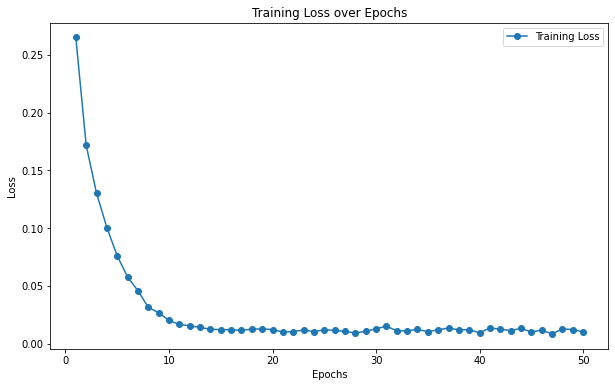

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

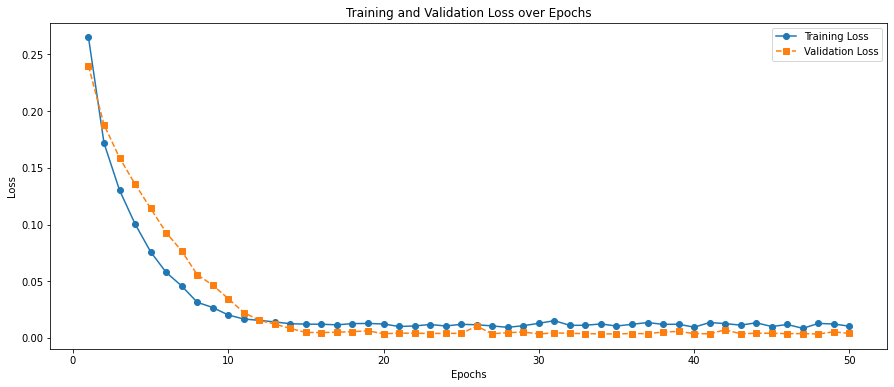

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT7/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07702918228146376
MAE : 0.06149915790228259


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.360286e+06,1264318.504
1,8.419483e+05,863206.294
2,5.252875e+05,635624.004
3,3.098342e+05,460009.672
4,4.713469e+05,610848.036
5,7.494012e+05,819257.445
6,1.172880e+06,1129627.707
7,1.417376e+06,1463383.236
8,1.624694e+06,1614536.727
9,1.776017e+06,1862498.612


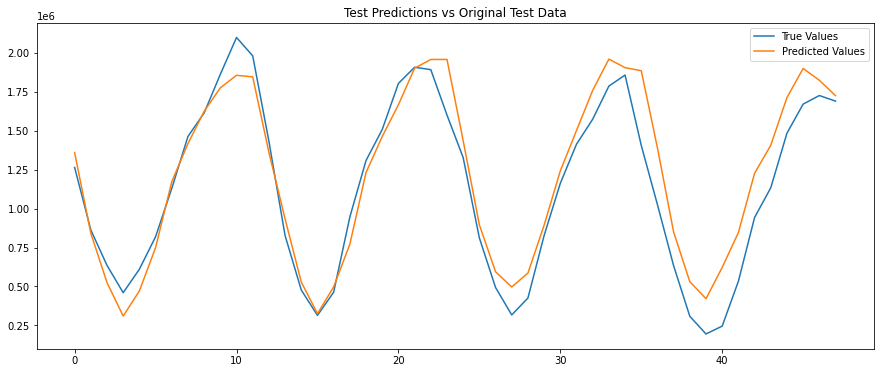

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

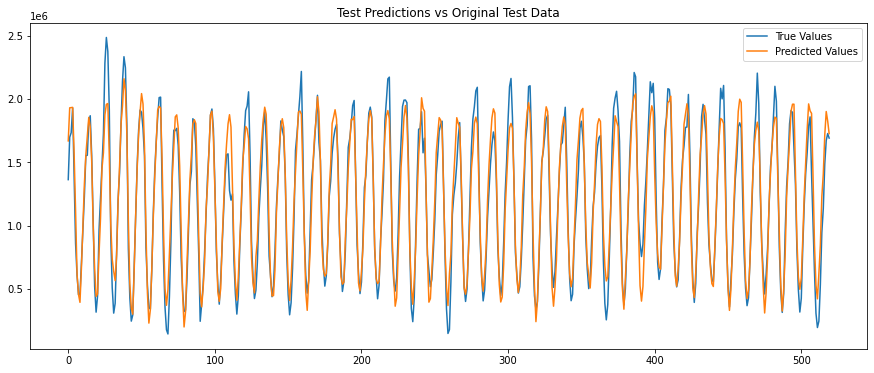

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()